In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

##Dados de Importação de Espumantes

In [ ]:
dados_Esp = pd.read_csv('/content/ImpEspumantes.csv', encoding = "utf = 8", skiprows = 0, skipfooter = 12, sep = ";", on_bad_lines = 'skip')

<ipython-input-2-440d48f7b992>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados_Esp = pd.read_csv('/content/ImpEspumantes.csv', encoding = "utf = 8", skiprows = 0, skipfooter = 12, sep = ";", on_bad_lines = 'skip')


In [ ]:
dados_Esp.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Africa do Sul,0,0,0,0,0,0,0,0,...,17583,72077,3574,14542,6980,36677,9882,64582,7650,69382
1,2,Alemanha,0,0,25,36,2864,2479,2900,3130,...,26853,169989,21174,65359,19977,46237,12447,26877,322,5111
2,3,Argentina,4980,3836,8811,7543,35301,26909,39208,20230,...,757716,2282614,469547,1304986,723847,2211657,1333420,4123623,839006,2765843
3,4,Austrália,0,0,0,0,0,0,0,0,...,16701,27592,7426,15190,8062,26208,0,0,3150,10474
4,5,Áustria,0,0,0,0,0,0,0,0,...,1269,11571,909,9399,90,1434,0,0,882,8833


In [ ]:
colunas_uteis_Esp = dados_Esp.select_dtypes(include = np.number).mean().index.tolist()
colunas_uteis_Esp.insert(0, "País")
del colunas_uteis_Esp[1]
colunas_uteis_Esp[:5]

['País', '1970', '1970.1', '1971', '1971.1']

In [ ]:
dados_Esp_Uteis = dados_Esp[colunas_uteis_Esp]
dados_Esp_Uteis.dropna(inplace=True)
dados_Esp_Uteis.head()

<ipython-input-5-887e7dbb336d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_Esp_Uteis.dropna(inplace=True)


,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,Africa do Sul,0,0,0,0,0,0,0,0,0,...,17583,72077,3574,14542,6980,36677,9882,64582,7650,69382
1,Alemanha,0,0,25,36,2864,2479,2900,3130,1667,...,26853,169989,21174,65359,19977,46237,12447,26877,322,5111
2,Argentina,4980,3836,8811,7543,35301,26909,39208,20230,2831,...,757716,2282614,469547,1304986,723847,2211657,1333420,4123623,839006,2765843
3,Austrália,0,0,0,0,0,0,0,0,0,...,16701,27592,7426,15190,8062,26208,0,0,3150,10474
4,Áustria,0,0,0,0,0,0,0,0,0,...,1269,11571,909,9399,90,1434,0,0,882,8833


In [ ]:
dados_Esp_Uteis = dados_Esp_Uteis.set_index("País")
dados_Esp_Uteis.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
País,,,,,,,,,,,,,,,,,,,,,
Africa do Sul,0,0,0,0,0,0,0,0,0,0,...,17583,72077,3574,14542,6980,36677,9882,64582,7650,69382
Alemanha,0,0,25,36,2864,2479,2900,3130,1667,2128,...,26853,169989,21174,65359,19977,46237,12447,26877,322,5111
Argentina,4980,3836,8811,7543,35301,26909,39208,20230,2831,3035,...,757716,2282614,469547,1304986,723847,2211657,1333420,4123623,839006,2765843
Austrália,0,0,0,0,0,0,0,0,0,0,...,16701,27592,7426,15190,8062,26208,0,0,3150,10474
Áustria,0,0,0,0,0,0,0,0,0,0,...,1269,11571,909,9399,90,1434,0,0,882,8833


In [ ]:
dados_Esp_Uteis["2021"].head()

,2021
País,
Africa do Sul,6980
Alemanha,19977
Argentina,723847
Austrália,8062
Áustria,90


<Axes: >

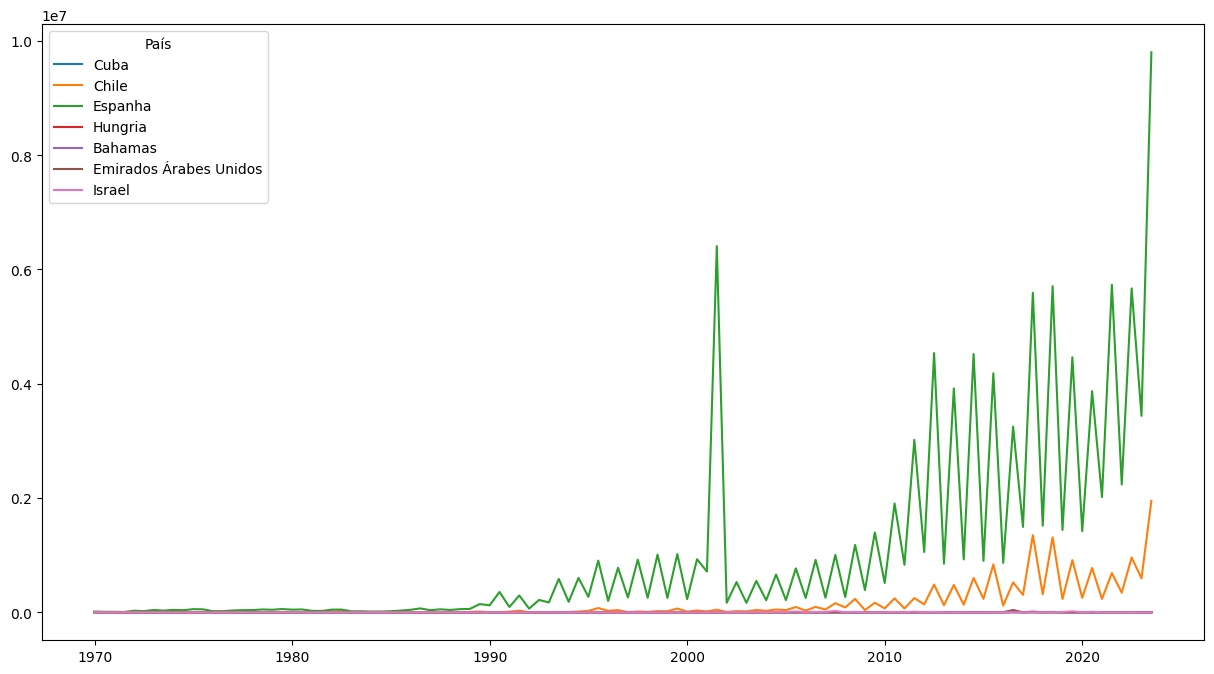

In [ ]:
dados_Esp_Uteis.sample(7).T.plot(figsize = (15,8))

In [ ]:
dados_Esp_Uteis["Total"] = dados_Esp_Uteis.sum(axis = 1) ## Anos com ".1" no título é o valor da importação
dados_Esp_Uteis.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,Total
País,,,,,,,,,,,,,,,,,,,,,
Africa do Sul,0,0,0,0,0,0,0,0,0,0,...,72077,3574,14542,6980,36677,9882,64582,7650,69382,1372444
Alemanha,0,0,25,36,2864,2479,2900,3130,1667,2128,...,169989,21174,65359,19977,46237,12447,26877,322,5111,2454215
Argentina,4980,3836,8811,7543,35301,26909,39208,20230,2831,3035,...,2282614,469547,1304986,723847,2211657,1333420,4123623,839006,2765843,75058927
Austrália,0,0,0,0,0,0,0,0,0,0,...,27592,7426,15190,8062,26208,0,0,3150,10474,572033
Áustria,0,0,0,0,0,0,0,0,0,0,...,11571,909,9399,90,1434,0,0,882,8833,69828


In [ ]:
ordem_total_Esp = dados_Esp_Uteis.sort_values(by = "Total", ascending = False)
ordem_total_Esp.drop("Total", axis = 1, inplace = True)
ordem_total_Esp.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
País,,,,,,,,,,,,,,,,,,,,,
França,18458,45798,26523,72645,35899,97186,49453,186096,83575,335930,...,1610293,13991734,1116188,8814571,1134059,12590570,1268840,13164535,1401753,20166147
Itália,0,0,554,485,5054,3328,5854,5395,24637,24784,...,1874314,4790173,1524542,3544718,1093108,3142129,1169909,3356633,952639,3533749
Espanha,12981,8568,7865,5230,27461,20026,40172,28895,41971,36350,...,1440241,4463736,1421655,3871128,2016806,5732174,2236061,5668798,3438264,9801916
Argentina,4980,3836,8811,7543,35301,26909,39208,20230,2831,3035,...,757716,2282614,469547,1304986,723847,2211657,1333420,4123623,839006,2765843
Chile,0,0,0,0,201,192,328,133,180,340,...,233064,912613,253225,775535,232948,686466,342625,959421,592991,1952709


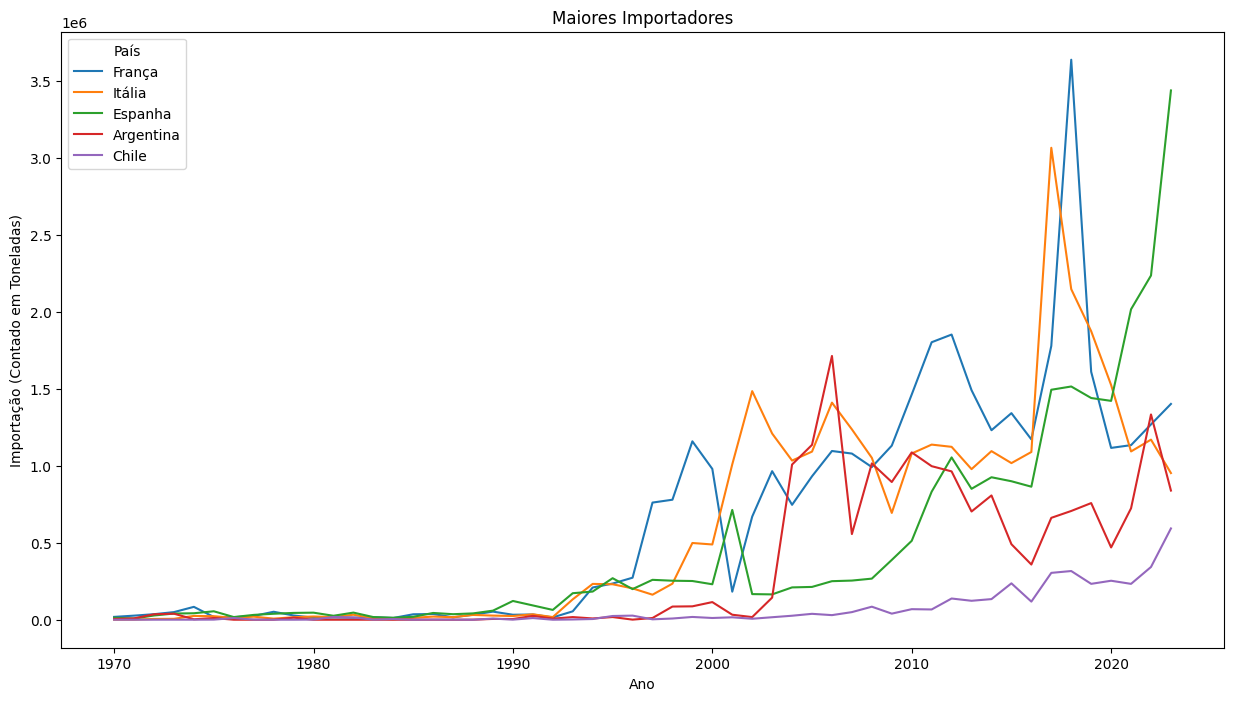

In [ ]:
remover_colunas_Esp = [col for col in ordem_total_Esp.columns if '.1' in col] ## Colunas com ".1" no título após o ano são os valores de cada exportação, assim, sendo inútil para essa análise em específico
ordem_total_Esp = ordem_total_Esp.drop(columns=remover_colunas_Esp)

ordem_total_Esp.head(5).T.plot(figsize = (15,8))

plt.title("Maiores Importadores")
plt.xlabel("Ano")
plt.ylabel("Importação (Contado em Toneladas)")

plt.show()

##Dados de Importação de Suco

In [ ]:
dados_Suco = pd.read_csv('/content/ImpSuco.csv', encoding = "utf = 8", skiprows = 0, skipfooter = 12, sep = ";", on_bad_lines = 'skip')

<ipython-input-12-c4710a19d4ff>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados_Suco = pd.read_csv('/content/ImpSuco.csv', encoding = "utf = 8", skiprows = 0, skipfooter = 12, sep = ";", on_bad_lines = 'skip')


In [ ]:
dados_Suco.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Africa do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Alemanha,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Argentina,0,0,0,0,0,0,3600,1350,...,0,0,0,0,0,0,0,0,0,0
3,4,Austria,0,0,0,0,0,0,0,0,...,666,655,0,0,0,0,0,0,0,0
4,5,Canadá,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,"Coreia do Sul, República",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,"Coreia do Norte, República",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,Chile,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,China,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Dinamarca,0,0,34,16,20,8,80,38,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
colunas_uteis_Suco = dados_Suco.select_dtypes(include = np.number).mean().index.tolist()
colunas_uteis_Suco.insert(0, "País")
del colunas_uteis_Suco[1]
colunas_uteis_Suco[:5]

['País', '1970', '1970.1', '1971', '1971.1']

In [ ]:
dados_Suco_Uteis = dados_Suco[colunas_uteis_Suco]
dados_Suco_Uteis.dropna(inplace=True)
dados_Suco_Uteis.head()

<ipython-input-15-d684d213077a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_Suco_Uteis.dropna(inplace=True)


,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,Africa do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alemanha,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Argentina,0,0,0,0,0,0,3600,1350,10200,...,0,0,0,0,0,0,0,0,0,0
3,Austria,0,0,0,0,0,0,0,0,0,...,666,655,0,0,0,0,0,0,0,0
4,Canadá,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_Suco_Uteis = dados_Suco_Uteis.set_index("País")
dados_Suco_Uteis.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
País,,,,,,,,,,,,,,,,,,,,,
Africa do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alemanha,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,3600,1350,10200,3500,...,0,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,...,666,655,0,0,0,0,0,0,0,0
Canadá,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

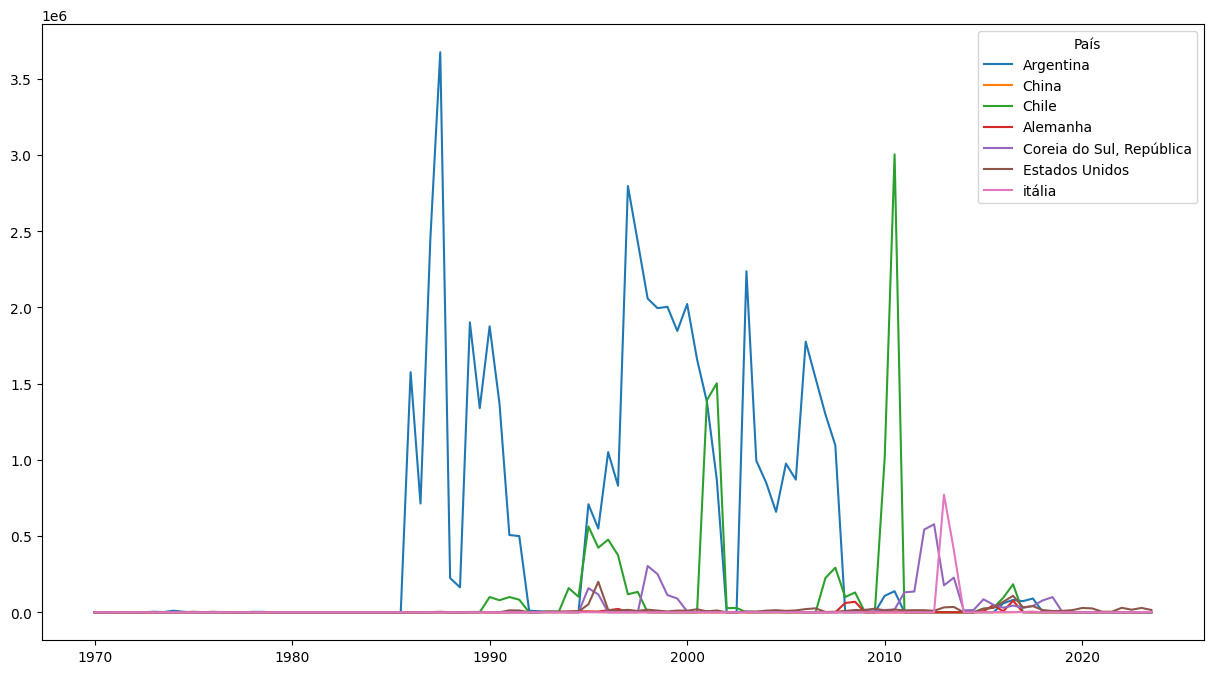

In [ ]:
dados_Suco_Uteis.sample(7).T.plot(figsize = (15,8))

In [ ]:
dados_Suco_Uteis["Total"] = dados_Suco_Uteis.sum(axis = 1)
dados_Suco_Uteis.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,Total
País,,,,,,,,,,,,,,,,,,,,,
Africa do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,971381
Alemanha,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,338742
Argentina,0,0,0,0,0,0,3600,1350,10200,3500,...,0,0,0,0,0,0,0,0,0,51380175
Austria,0,0,0,0,0,0,0,0,0,0,...,655,0,0,0,0,0,0,0,0,63426
Canadá,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94623


In [ ]:
ordem_total_Suco = dados_Suco_Uteis.sort_values(by = "Total", ascending = False)
ordem_total_Suco.drop("Total", axis = 1, inplace = True)
ordem_total_Suco.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
País,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,0,3600,1350,10200,3500,...,0,0,0,0,0,0,0,0,0,0
Chile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Coreia do Sul, República",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Estados Unidos,0,0,210,777,0,0,7,7,731,406,...,9273,14093,28180,25418,3870,3551,29414,16781,28627,15200
itália,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1836,1966


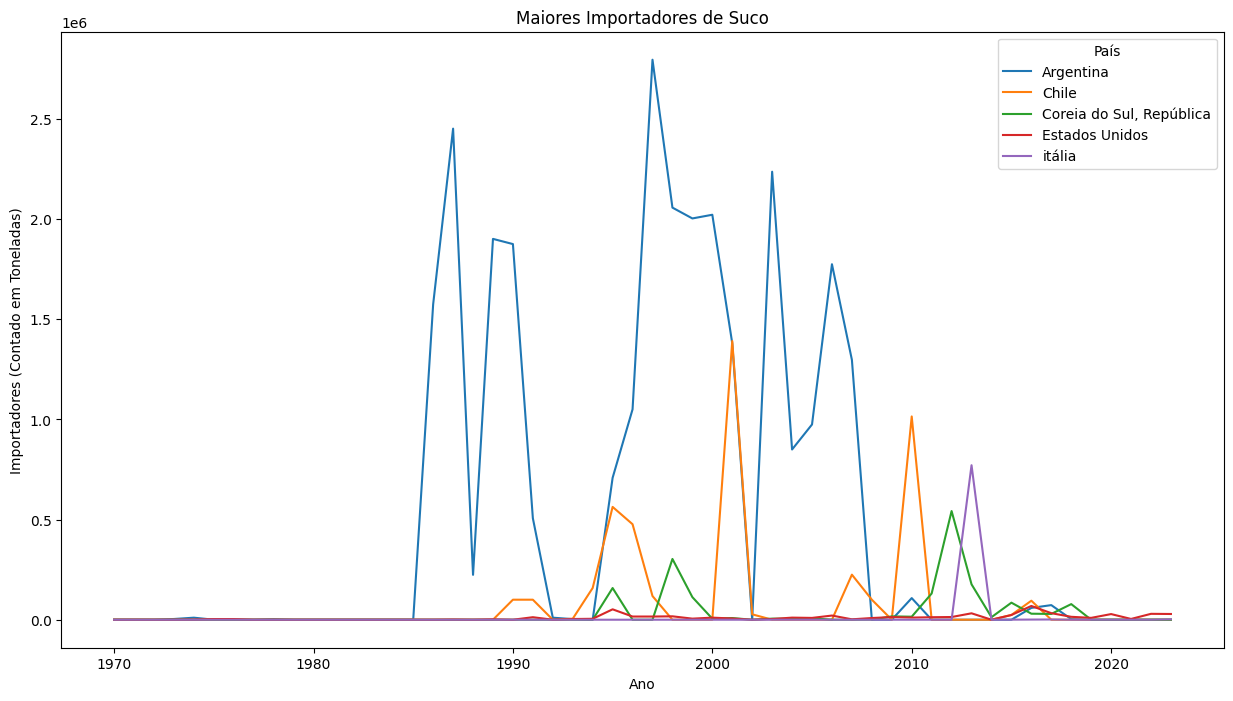

In [ ]:
remover_colunas_Suco = [col for col in ordem_total_Suco.columns if '.1' in col] ## Colunas com ".1" no título após o ano são os valores de cada exportação, assim, sendo inútil para essa análise em específico
ordem_total_Suco = ordem_total_Suco.drop(columns=remover_colunas_Suco)

ordem_total_Suco.head(5).T.plot(figsize = (15,8))
plt.title("Maiores Importadores de Suco")
plt.xlabel("Ano")
plt.ylabel("Importadores (Contado em Toneladas)")

plt.show()

##Dados de Importação de Vinho

In [ ]:
dados_Vinho = pd.read_csv('/content/ImpVinhos.csv', encoding = "utf = 8", skiprows = 0, skipfooter = 12, sep = ";", on_bad_lines = 'skip')

<ipython-input-21-33ed656548bd>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados_Vinho = pd.read_csv('/content/ImpVinhos.csv', encoding = "utf = 8", skiprows = 0, skipfooter = 12, sep = ";", on_bad_lines = 'skip')


In [ ]:
colunas_uteis_Vinho = dados_Vinho.select_dtypes(include = np.number).mean().index.tolist()
colunas_uteis_Vinho.insert(0, "País")
del colunas_uteis_Vinho[1]
colunas_uteis_Vinho[:5]

['País', '1970', '1970.1', '1971', '1971.1']

In [ ]:
dados_Vinho_Uteis = dados_Vinho[colunas_uteis_Vinho]
dados_Vinho_Uteis.dropna(inplace=True)
dados_Vinho_Uteis.head()

<ipython-input-23-5042a7467204>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_Vinho_Uteis.dropna(inplace=True)


,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,Africa do Sul,0,0.0,0,0,0,0,0,0,0,...,1092042,3604038,627150,1701072,859169,2508140,738116,2266827,522733,1732850
1,Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,219173,...,101055,412794,136992,504168,106541,546967,92600,438595,102456,557947
2,Argélia,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arábia Saudita,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,2510,8761,0,0,8,161
4,Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,215930,...,16548931,54527380,22610267,66322932,26869241,79527959,27980574,87519642,25276991,83918138


In [ ]:
dados_Vinho_Uteis = dados_Vinho_Uteis.set_index("País")
dados_Vinho_Uteis.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
País,,,,,,,,,,,,,,,,,,,,,
Africa do Sul,0,0.0,0,0,0,0,0,0,0,0,...,1092042,3604038,627150,1701072,859169,2508140,738116,2266827,522733,1732850
Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,219173,202502,...,101055,412794,136992,504168,106541,546967,92600,438595,102456,557947
Argélia,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arábia Saudita,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,2510,8761,0,0,8,161
Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,215930,167473,...,16548931,54527380,22610267,66322932,26869241,79527959,27980574,87519642,25276991,83918138


<Axes: >

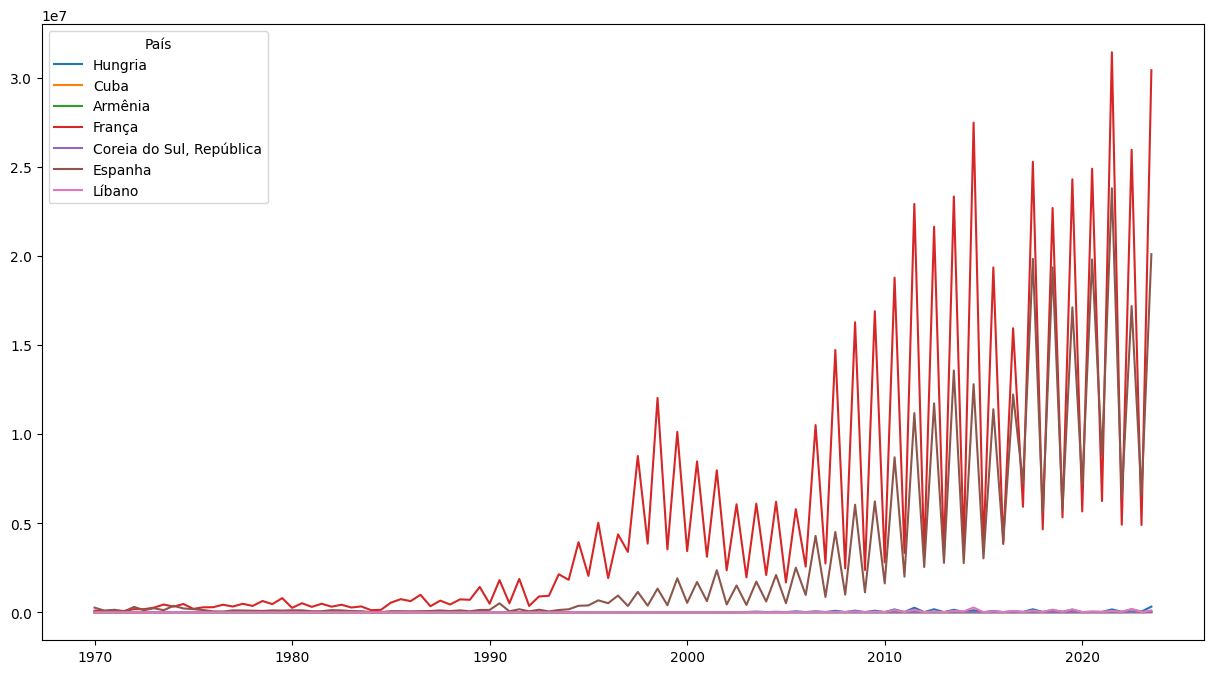

In [ ]:
dados_Vinho_Uteis.sample(7).T.plot(figsize = (15,8))

In [ ]:
dados_Vinho_Uteis["Total"] = dados_Vinho_Uteis.sum(axis = 1) ## Base para o Total
dados_Vinho_Uteis.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,Total
País,,,,,,,,,,,,,,,,,,,,,
Africa do Sul,0,0.0,0,0,0,0,0,0,0,0,...,3604038,627150,1701072,859169,2508140,738116,2266827,522733,1732850,5.794623e+07
Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,219173,202502,...,412794,136992,504168,106541,546967,92600,438595,102456,557947,1.954578e+08
Argélia,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.300000e+01
Arábia Saudita,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,2510,8761,0,0,8,161,1.529500e+04
Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,215930,167473,...,54527380,22610267,66322932,26869241,79527959,27980574,87519642,25276991,83918138,1.427406e+09


In [ ]:
ordem_total_Vinho = dados_Vinho_Uteis.sort_values(by = "Total", ascending = False)
ordem_total_Vinho.drop("Total", axis = 1, inplace = True)
ordem_total_Vinho.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
País,,,,,,,,,,,,,,,,,,,,,
Chile,162370,101819.0,74406,52240,161736,95654,301559,212140,550691,429885,...,52697108,145471294,72726186,176540499,69617587,182568098,68881232,184335335,62358765,170146247
Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,215930,167473,...,16548931,54527380,22610267,66322932,26869241,79527959,27980574,87519642,25276991,83918138
Portugal,785609,531480.0,897310,620790,1650727,1226232,2818320,2238637,2245288,1917710,...,18228699,51444189,23627260,66353572,25925363,75668823,24108787,64795326,25099409,71970948
Itália,58802,32376.0,108409,56377,142196,96943,258754,186334,305763,278089,...,10323254,33355982,9659999,32477890,11231625,39852162,9622119,33330465,8868133,34760596
França,91544,78135.0,88714,72978,176688,173001,259060,435641,316584,465175,...,5324383,24299524,5658139,24894394,6241310,31428188,4911903,25955232,4899631,30421272


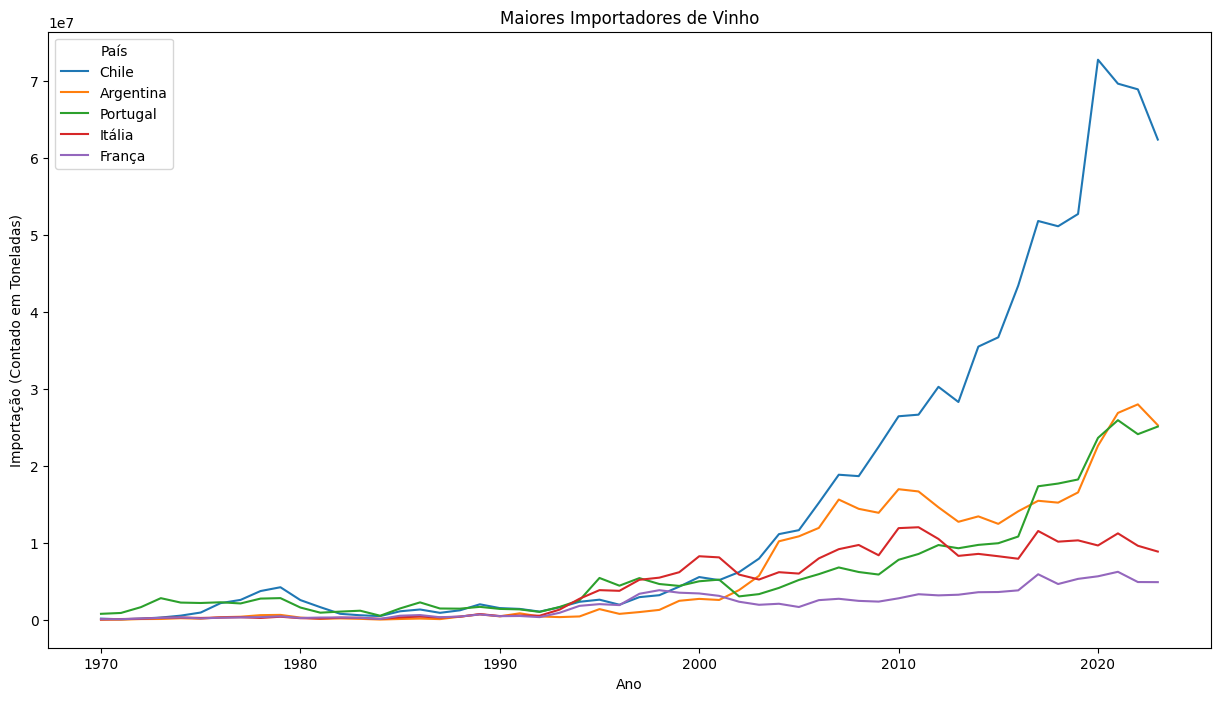

In [ ]:
remover_colunas_Vinho = [col for col in ordem_total_Vinho.columns if '.1' in col] ## Colunas com ".1" no título após o ano são os valores de cada exportação, assim, sendo inútil para essa análise em específico
ordem_total_Vinho = ordem_total_Vinho.drop(columns=remover_colunas_Vinho)

ordem_total_Vinho.head(5).T.plot(figsize = (15,8))
plt.title("Maiores Importadores de Vinho")
plt.xlabel("Ano")
plt.ylabel("Importação (Contado em Toneladas)")

plt.show()

##Dados Finais

In [ ]:
maior_importacao_Esp = dados_Esp_Uteis['Total'].idxmax()
print(f"O país com o maior número de importação de espumantes é: {maior_importacao_Esp}, com o valor total de {dados_Esp_Uteis.max().max()} de espumantes importados.")

maior_importacao_Suco = dados_Suco_Uteis['Total'].idxmax()
print(f"O país com o maior número de importação de suco é: {maior_importacao_Suco}, com o valor total de {dados_Suco_Uteis.max().max()} de garradas de suco importadas.")

maior_importacao_Vinho = dados_Vinho_Uteis['Total'].idxmax()
print(f"O país com o maior número de importação de vinho é: {maior_importacao_Vinho}, com o valor total de {dados_Vinho_Uteis.max().max()} de vinhos importados.")

O país com o maior número de importação de espumantes é: França, com o valor total de 389392715 de espumantes importados.
O país com o maior número de importação de suco é: Argentina, com o valor total de 51380175 de garradas de suco importadas.
O país com o maior número de importação de vinho é: Chile, com o valor total de 3028897202.0 de vinhos importados.


##Seaborn

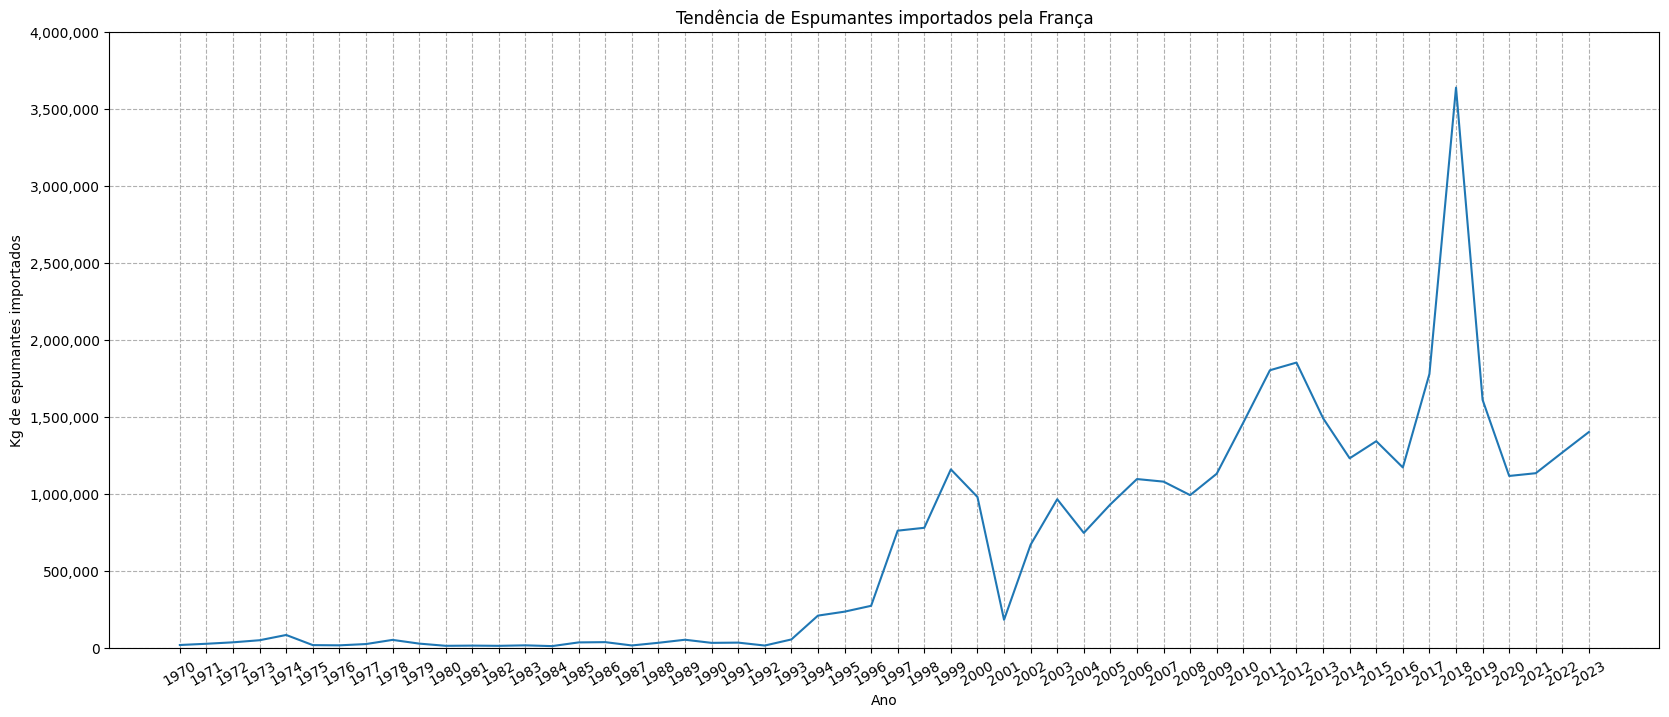

In [ ]:
##Importado pela França (Espumantes)

plt.figure(figsize = (20,8))
axis_Esp = sb.lineplot(x = ordem_total_Esp.columns, y = ordem_total_Esp.loc[maior_importacao_Esp])
axis_Esp.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation = 30)
plt.grid(linestyle ="--")
plt.ylim(0, 4000000)
plt.title("Tendência de Espumantes importados pela França")
plt.ylabel("Kg de espumantes importados")
plt.xlabel("Ano")
plt.show()

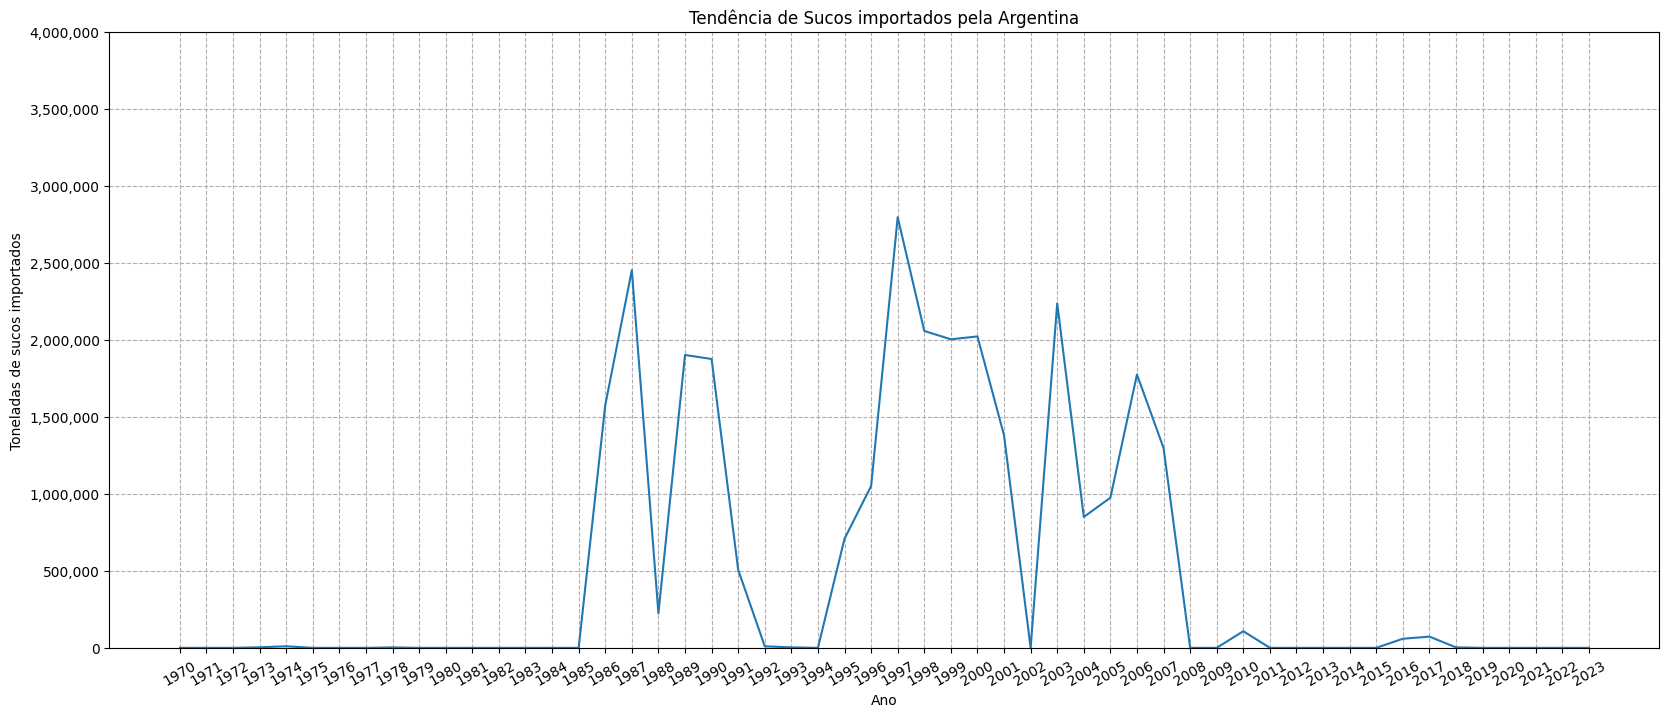

In [ ]:
##Importado pela Argentina (Sucos)

plt.figure(figsize = (20,8))
axis_Suco = sb.lineplot(x = ordem_total_Suco.columns, y = ordem_total_Suco.loc[maior_importacao_Suco])
axis_Suco.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation = 30)
plt.grid(linestyle ="--")
plt.ylim(0, 4000000)
plt.title("Tendência de Sucos importados pela Argentina")
plt.ylabel("Toneladas de sucos importados")
plt.xlabel("Ano")
plt.show()

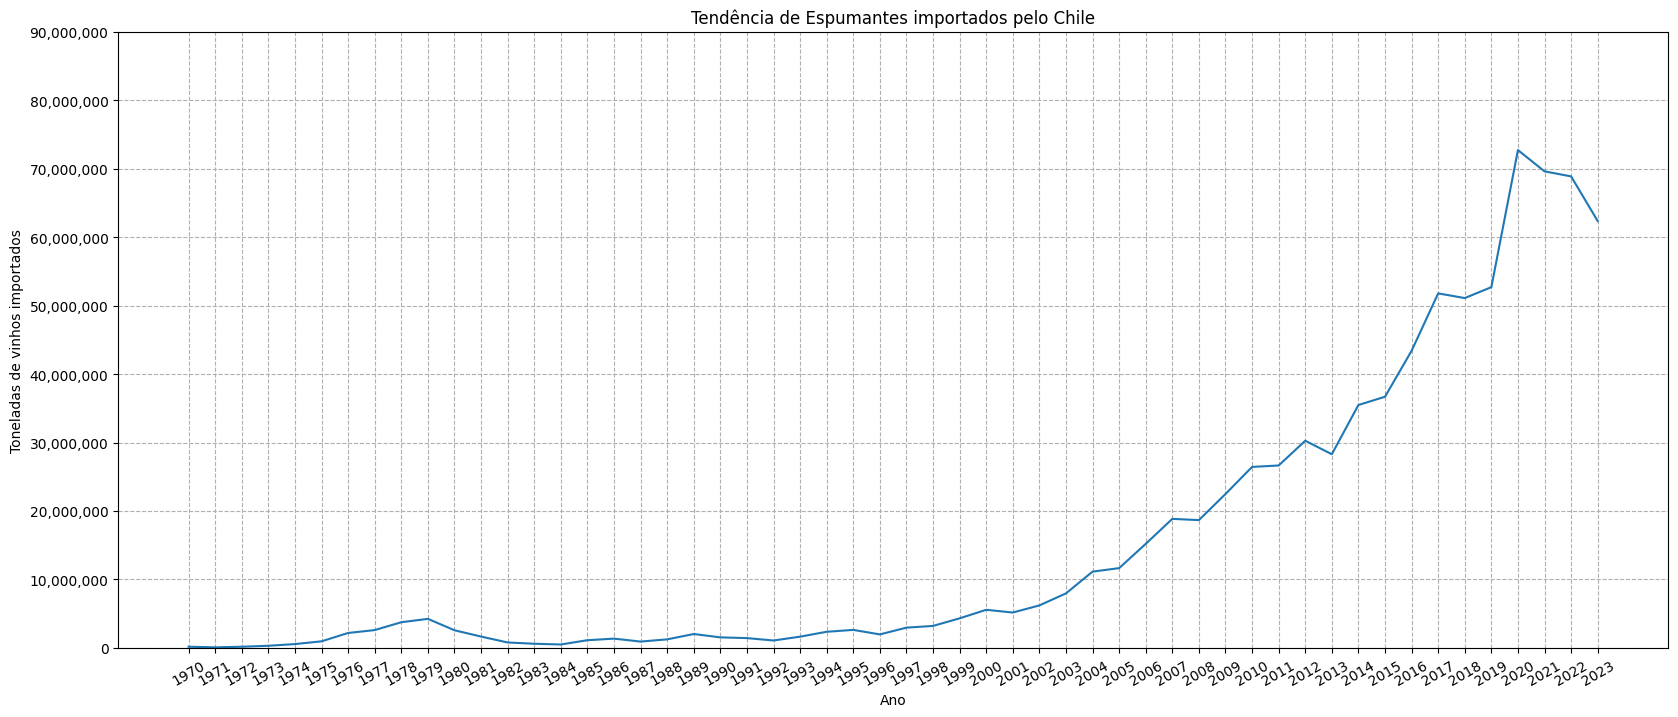

In [ ]:
##Importado pelo Chile (Vinhos)

plt.figure(figsize = (20,8))
axis_Vinho = sb.lineplot(x = ordem_total_Vinho.columns, y = ordem_total_Vinho.loc[maior_importacao_Vinho])
axis_Vinho.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation = 30)
plt.grid(linestyle ="--")
plt.ylim(0, 90000000)
plt.title("Tendência de Espumantes importados pelo Chile")
plt.ylabel("Toneladas de vinhos importados")
plt.xlabel("Ano")
plt.show()

##Valor Total